In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_games = pd.read_csv('https://stepik.org/media/attachments/lesson/383837/games.csv')
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [11]:
df_games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df_games.shape

(16598, 11)

In [13]:
df_games.dropna(inplace = True)

In [14]:
df_games.shape

(16291, 11)

Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.
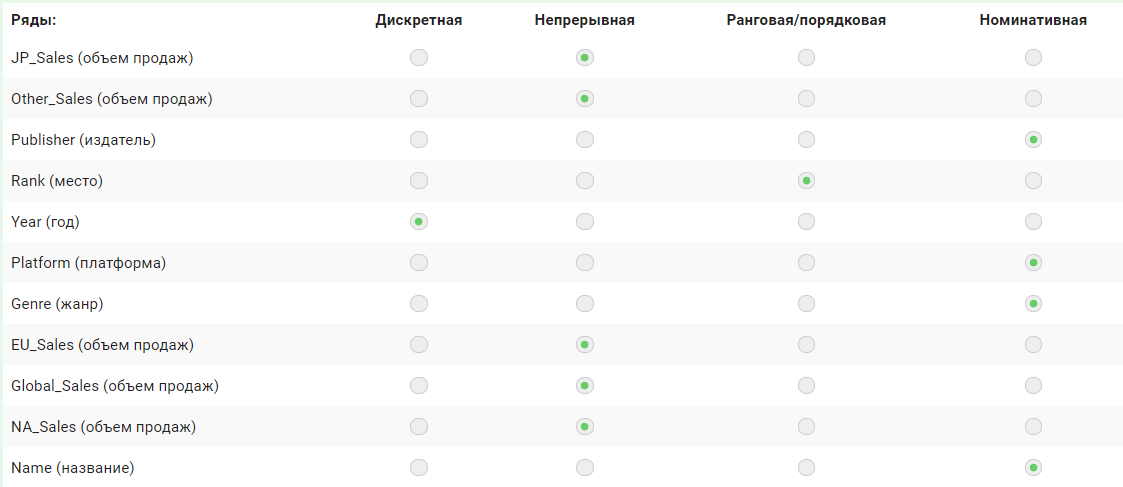

In [16]:
df_games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

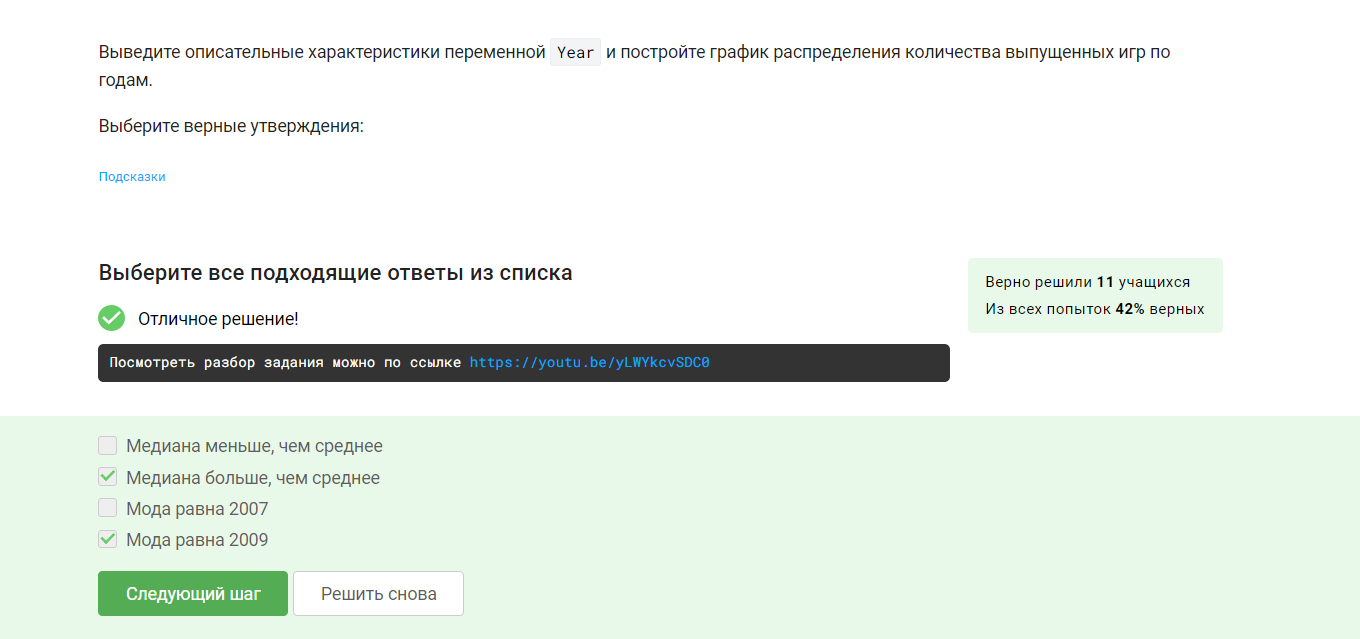

In [33]:
from scipy import stats as ss

In [20]:
df_games.Year = df_games.Year.astype('int')

In [27]:
sns.set(rc={'figure.figsize':(16,8)}, style = "whitegrid")

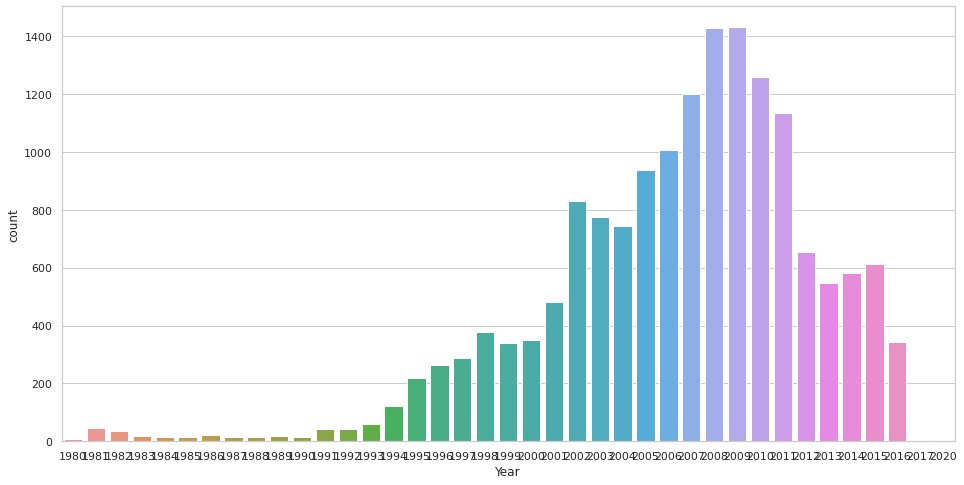

In [28]:
sns.countplot(df_games.Year)

Фильтруем по годам и делим на общее кол-во рядов, чтобы оценить доли каждого:

In [29]:
df_games.query('Year > 2007').shape[0]/df_games.shape[0]

0.4906390031305629

In [30]:
df_games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [34]:
ss.mode(df_games.Year)

ModeResult(mode=array([2009]), count=array([1431]))

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания через запятую с пробелом. Пример: 

'Wii', 'NES', 'GB'

In [42]:
pct = df_games.Platform.value_counts(normalize = True).mul(100).to_frame('percentage')
pct.query('percentage > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [44]:
df_games.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [46]:
nintendo = df_games.query('Publisher == "Nintendo"')
nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['mean', 'median'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
median,0.375000,0.120000,0.280000,0.030000,0.920000


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [50]:
nintendo_japan = df_games.query('Publisher == "Nintendo"')[['JP_Sales', 'Genre']]
nintendo_japan

,JP_Sales,Genre
0,3.77,Sports
1,6.81,Platform
2,3.79,Racing
3,3.28,Sports
4,10.22,Role-Playing
...,...,...
16269,0.01,Action
16357,0.01,Puzzle
16456,0.01,Misc
16473,0.01,Adventure


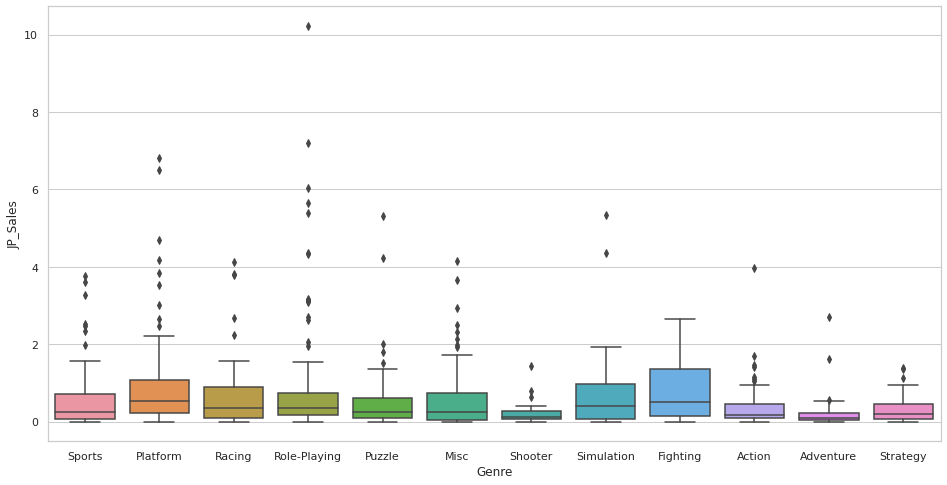

In [52]:
sns.boxplot(data = nintendo_japan, x = 'Genre', y = 'JP_Sales');

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [54]:
df_sport = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platfrom', 'Racing', 'Sports')") \
                    .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()
df_sport

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
78,Sports,2010,2.18
79,Sports,2012,1.05
80,Sports,2013,1.69
81,Sports,2014,0.88


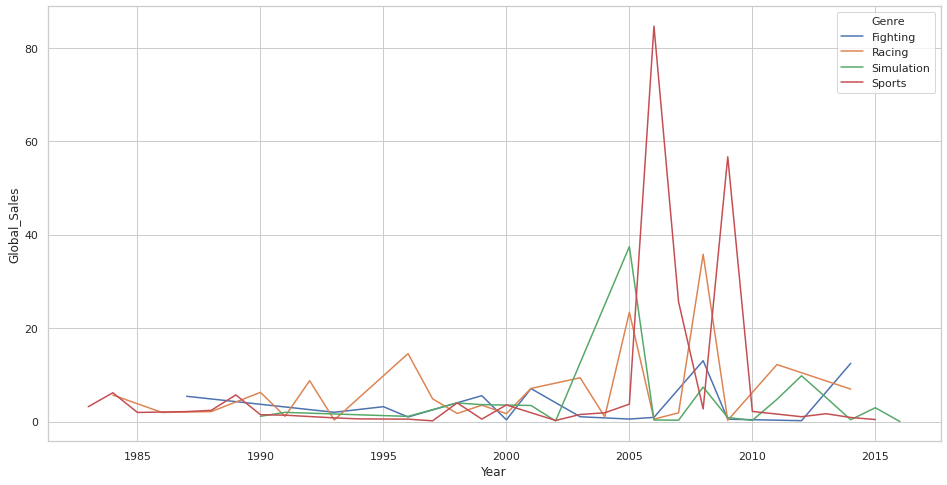

In [56]:
sns.lineplot(data =df_sport, x ='Year', y = 'Global_Sales', hue = 'Genre');